<a href="https://colab.research.google.com/github/amit6604/Colab-Tutorials/blob/master/Tensorflow_and_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) How to import tensorflow & Keras to run on Google Colab

2) How to use free GPU acceleration to train model

3) Preview of deep learning via keras and Tensorflow

In [2]:
# Installing dependencies
!pip install tensorflow
!pip install keras

# Importing modules
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt



In [3]:
# Loading dummy Fashion Mnist Dataset

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()





4423680/4422102 [==============================] - 0s 0us/step


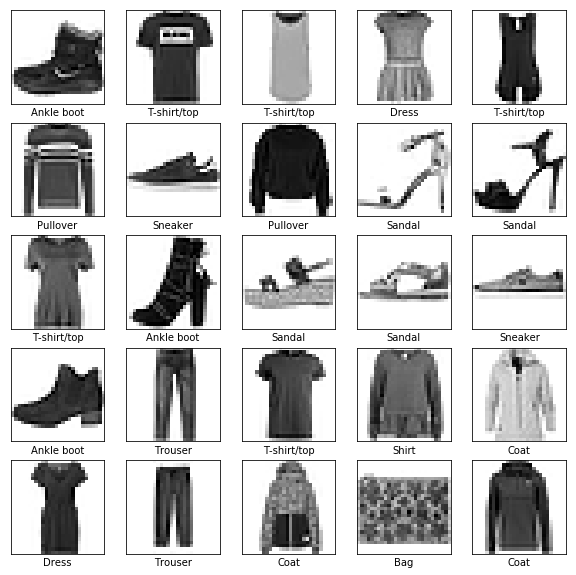

In [5]:


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images  = train_images / 255.0 #normalizing

test_images =  test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model


In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)])


# Compile the model
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs = 5)


Epoch 1/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.4982 - acc: 0.8245
Epoch 2/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3761 - acc: 0.8637
Epoch 3/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3368 - acc: 0.8778
Epoch 4/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3144 - acc: 0.8847
Epoch 5/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2971 - acc: 0.8903


10000/10000 [==============================] - 1s 54us/sample - loss: 0.3432 - acc: 0.8776
Test Accuracy: 0.8776


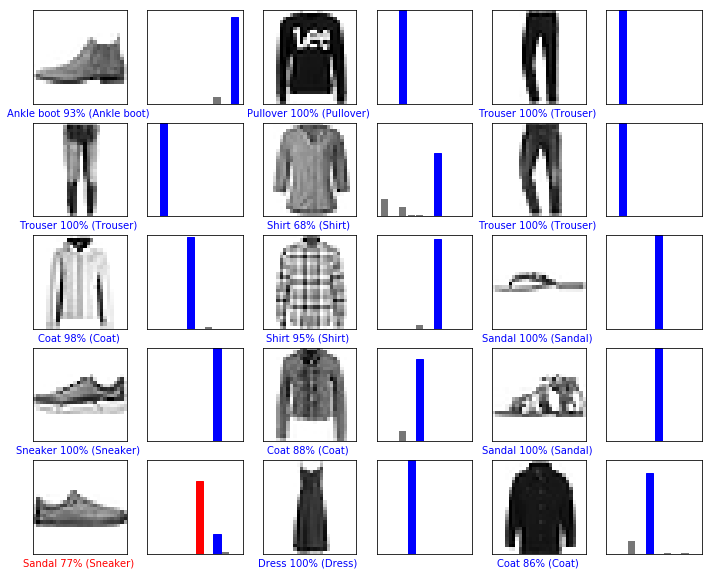

In [13]:
# Evaluate the model

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test Accuracy:', test_acc)

# Make Predictions

predictions = model.predict(test_images)


def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  
  if predicted_label == true_label:
    color= 'blue'
  else:
    color = 'red'
    
  plt.xlabel("{} {:2.0f}% ({}) ".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)
  
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()